1、预测隐形眼镜的类型

分析lenses.txt文件

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
lenses = pd.read_csv('./data/lenses.txt', sep='\t', header=None)

In [29]:
lenses.head()

,0,1,2,3,4
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses


In [33]:
for i in range(lenses.shape[1]-1):
    lenses[i] = lenses[i].map({n:i for i, n in enumerate(lenses[i].unique())})

In [34]:
lenses.head()

,0,1,2,3,4
0,0,0,0,0,no lenses
1,0,0,0,1,soft
2,0,0,1,0,no lenses
3,0,0,1,1,hard
4,0,1,0,0,no lenses


In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(lenses.iloc[:, 0:4], lenses.iloc[:, -1], test_size=0.2)

In [42]:
tree = DecisionTreeClassifier()

In [43]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
tree.predict(X_test)

array(['hard', 'no lenses', 'soft', 'no lenses', 'soft'], dtype=object)

In [45]:
tree.score(X_test, y_test)

1.0

In [46]:
tree.score(X_train, y_train)

1.0

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)

array(['hard', 'no lenses', 'soft', 'no lenses', 'soft'], dtype=object)

In [49]:
rfc.score(X_test, y_test)

1.0

2、使用make_blobs产生数据，训练模型，并画出类别边界

In [50]:
from sklearn.datasets import make_blobs

e:\mytools\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [52]:
data, target = make_blobs()

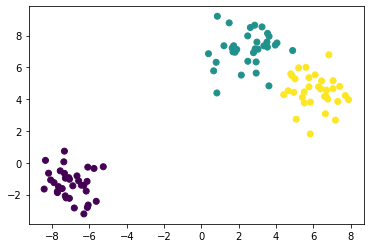

In [55]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [74]:
tree = DecisionTreeClassifier()
tree.fit(data, target)

DecisionTreeClassifier(max_depth=4)

In [75]:
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 1000)
y = np.linspace(data[:, 1].min(), data[:, 1].max(), 1000)
X, Y = np.meshgrid(x, y)

In [76]:
XY = np.c_[X.ravel(), Y.ravel()]

In [77]:
y_ = tree.predict(XY)

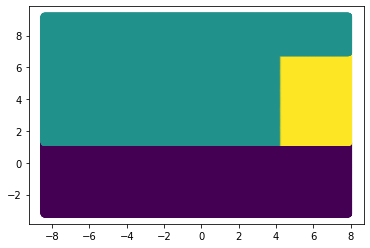

In [79]:
plt.scatter(XY[:, 0], XY[:, 1], c=y_)

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


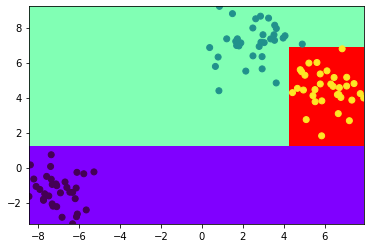

In [78]:
plt.pcolor(X, Y, y_.reshape(1000, 1000), cmap='rainbow')
plt.scatter(data[:, 0], data[:, 1], c=target)

In [81]:
rfc = RandomForestClassifier(max_depth=2)
rfc.fit(data, target)

RandomForestClassifier(max_depth=2)

In [82]:
y_r = rfc.predict(XY)

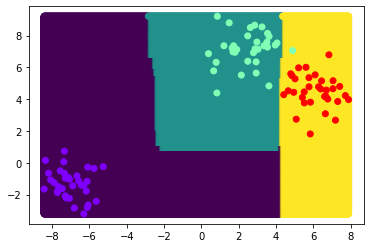

In [87]:
plt.scatter(XY[:, 0], XY[:, 1], c=y_r)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='rainbow')

#### 3. 使用随机森林对手写数字数据集进行预测. 跟其他的算法进行对比. 不光对比得分,还对比训练和预测的时间. 还要对随机森林进行调参, 调到合适拟合的状态.

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
data = digits.data

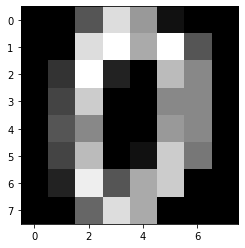

In [9]:
plt.imshow(digits.images[0], cmap='gray')

In [10]:
target = digits.target

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [97]:
depth = {}
for i in range(1,50):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    if tree.score(X_test, y_test)> 0.6:
        n = abs(tree.score(X_test, y_test)-tree.score(X_train, y_train))
        depth[i] = n

In [115]:
depth.keys(min(depth.iteritems(), key=lambda depth : depth[1]))

AttributeError: 'dict' object has no attribute 'iteritems'

In [94]:
depth2 = {}
for i in range(1,50):
    rfc = RandomForestClassifier(max_depth=i)
    rfc.fit(X_train, y_train)
    if rfc.score(X_test, y_test)> 0.6:
        n = abs(rfc.score(X_test, y_test)-rfc.score(X_train, y_train))
        depth2[i] = n

In [95]:
depth2

{1: 0.03323474831825568,
 2: 0.01695082347483179,
 3: 0.02590466249130141,
 4: 0.003595453491069378,
 5: 0.021468336812804467,
 6: 0.009690327070285387,
 7: 0.023602412433310183,
 8: 0.023608211551844116,
 9: 0.01597077244258882,
 10: 0.022222222222222254,
 11: 0.01388888888888884,
 12: 0.025000000000000022,
 13: 0.011111111111111072,
 14: 0.019444444444444486,
 15: 0.01666666666666672,
 16: 0.022222222222222254,
 17: 0.019444444444444486,
 18: 0.01666666666666672,
 19: 0.01666666666666672,
 20: 0.022222222222222254,
 21: 0.01388888888888884,
 22: 0.019444444444444486,
 23: 0.019444444444444486,
 24: 0.022222222222222254,
 25: 0.01388888888888884,
 26: 0.01666666666666672,
 27: 0.01388888888888884,
 28: 0.02777777777777779,
 29: 0.022222222222222254,
 30: 0.01666666666666672,
 31: 0.01666666666666672,
 32: 0.01388888888888884,
 33: 0.011111111111111072,
 34: 0.01666666666666672,
 35: 0.019444444444444486,
 36: 0.019444444444444486,
 37: 0.011111111111111072,
 38: 0.01666666666666672,
 

In [89]:
knn = KNeighborsClassifier()
logistic = LogisticRegression(max_iter=10000)
tree = DecisionTreeClassifier(max_depth=depth.index(max(depth))+1)
rfc = RandomForestClassifier(max_depth=depth2.index(max(depth2))+1)

In [90]:
%time knn.fit(X_train, y_train)
%time logistic.fit(X_train, y_train)
%time tree.fit(X_train, y_train)
%time rfc.fit(X_train, y_train)

Wall time: 999 µs
Wall time: 3.09 s
Wall time: 2.99 ms
Wall time: 149 ms


RandomForestClassifier(max_depth=1)

In [91]:
display(knn.score(X_train, y_train),logistic.score(X_train, y_train),tree.score(X_train, y_train),rfc.score(X_train, y_train))

0.988865692414753

1.0

0.1990257480862909

0.6896311760612387

In [92]:
display(knn.score(X_test, y_test),logistic.score(X_test, y_test),tree.score(X_test, y_test),rfc.score(X_test, y_test))

0.9916666666666667

0.9777777777777777

0.19444444444444445

0.6944444444444444